In [ ]:
#reference:about tensorflow.keras.preprocessing.image:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image
#reference:about Dataset link: frome Kaggle:
#                             Artwork_dataset link: https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time
#                             Anime_Face_Dataset link:https://www.kaggle.com/datasets/defileroff/comic-faces-paired-synthetic-v2
#                             Human_Face_Dataset link:https://www.kaggle.com/datasets/defileroff/comic-faces-paired-synthetic-v2
#DCGANs code reference link:https://www.kaggle.com/code/brsdincer/human-anime-face-transformation-artwork-dcgan
#I've referenced a lot of DCGANs models and code in this project here.The link includes the author's name and the data.https://www.kaggle.com/code/brsdincer/human-anime-face-transformation-artwork-dcgan

In [ ]:
!pip uninstall lightgbm
!pip install lightgbm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import os
import os.path
from pathlib import Path
import glob
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
from skimage.transform import resize
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import zipfile
from io import BytesIO
from nibabel import FileHolder
from nibabel.analyze import AnalyzeImage
import PIL
from IPython import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose, LeakyReLU
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

2024-03-09 14:10:35.611617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
import shutil
#reference:about "os.path" from: https://www.geeksforgeeks.org/python-os-path-join-method/
#reference:about "shutil.move" from: https://www.geeksforgeeks.org/python-shutil-move-method/

original_dataset_dir = '/Users/liaotao/Documents/GitHub/AI-4-Media-23-24/期末ddl/archive 2 13.13.37'
target_dir = '/Users/liaotao/Documents/GitHub/AI-4-Media-23-24/期末ddl/arkwork1' 
for root, dirs, files in os.walk(original_dataset_dir):
    for file in files:
        original_file_path = os.path.join(root, file)
        _, extension = os.path.splitext(file)
        new_filename = f"file_{len(os.listdir(target_dir)) + 1}{extension}"
        target_file_path = os.path.join(target_dir, new_filename)
        
        shutil.move(original_file_path, target_file_path)




In [3]:
Anime_Face_Dataset = Path("/Users/liaotao/Documents/GitHub/AI-4-Media-23-24/期末ddl/comicsface")
Human_Face_Dataset = Path("/Users/liaotao/Documents/GitHub/AI-4-Media-23-24/期末ddl/realface")
ArtWork_Dataset = Path("/Users/liaotao/Documents/GitHub/AI-4-Media-23-24/期末ddl/REArtwork1")

In [4]:
Anime_Images = list(Anime_Face_Dataset.glob(r"*.jpg"))
Human_Images = list(Human_Face_Dataset.glob(r"*.jpg"))
ArtWork_Images = list(ArtWork_Dataset.glob(r"*.jpg"))

In [5]:
Reduce_Anime_Images = Anime_Images[0:600]
Reduce_Human_Images = Human_Images[0:50]

In [6]:
Mix_Dataset = []

for images_Anime in Reduce_Anime_Images:
    Mix_Dataset.append(images_Anime)
    
for images_Human in Reduce_Human_Images:
    Mix_Dataset.append(images_Human)

In [7]:
Mix_Series = pd.Series(Mix_Dataset,name="JPG").astype(str)
Anime_Series = pd.Series(Reduce_Anime_Images,name="JPG").astype(str)
Human_Series = pd.Series(Reduce_Human_Images,name="JPG").astype(str)
ArtWork_Images_Series = pd.Series(ArtWork_Images,name="JPG").astype(str)


In [8]:
print(Mix_Series.head(-1))

0      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
1      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
2      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
3      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
4      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
                             ...                        
644    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
645    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
646    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
647    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
648    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
Name: JPG, Length: 649, dtype: object


In [9]:
print(Anime_Series.head(-1))

0      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
1      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
2      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
3      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
4      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
                             ...                        
594    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
595    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
596    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
597    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
598    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
Name: JPG, Length: 599, dtype: object


In [10]:
print(Human_Series.head(-1))

0     /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
1     /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
2     /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
3     /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
4     /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
5     /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
6     /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
7     /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
8     /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
9     /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
10    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
11    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
12    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
13    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
14    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
15    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
16    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
17    /Users/liaotao/Documents/GitHub/AI-4-Media

In [12]:
print(ArtWork_Images_Series.head(-1))

0      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
1      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
2      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
3      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
4      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
                             ...                        
994    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
995    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
996    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
997    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
998    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
Name: JPG, Length: 999, dtype: object


In [13]:
Mix_Series = Mix_Series.sample(frac=1).reset_index(drop=True)

In [14]:
print(Mix_Series.head(-1))

0      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
1      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
2      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
3      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
4      /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
                             ...                        
644    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
645    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
646    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
647    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
648    /Users/liaotao/Documents/GitHub/AI-4-Media-23-...
Name: JPG, Length: 649, dtype: object


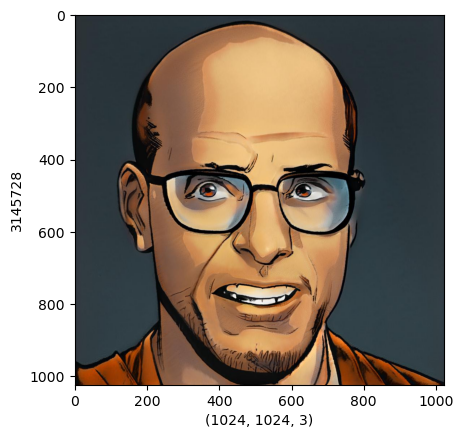

In [15]:
example_IMG = Mix_Series[44]
Reading_IMG = cv2.imread(example_IMG)
Transformation_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)

plt.xlabel(Transformation_IMG.shape)
plt.ylabel(Transformation_IMG.size)
plt.imshow(Transformation_IMG)

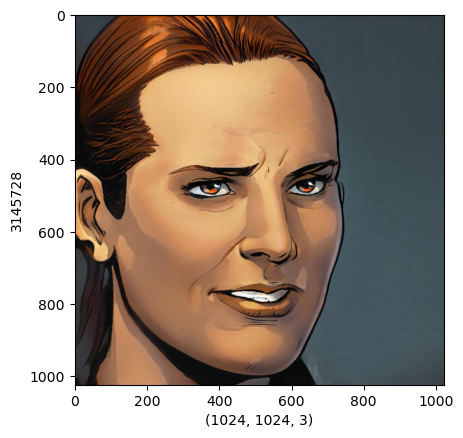

In [16]:
example_IMG = Mix_Series[4]
Reading_IMG = cv2.imread(example_IMG)
Transformation_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)

plt.xlabel(Transformation_IMG.shape)
plt.ylabel(Transformation_IMG.size)
plt.imshow(Transformation_IMG)

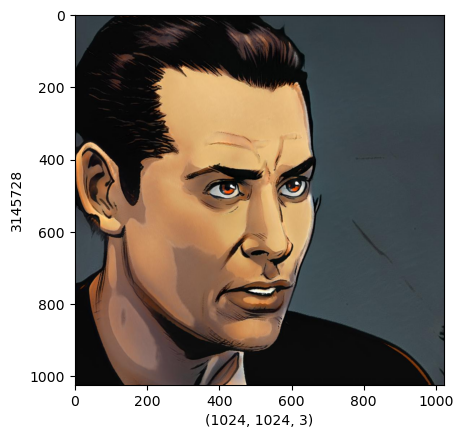

In [17]:
example_IMG = Mix_Series[6]
Reading_IMG = cv2.imread(example_IMG)
Transformation_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)

plt.xlabel(Transformation_IMG.shape)
plt.ylabel(Transformation_IMG.size)
plt.imshow(Transformation_IMG)

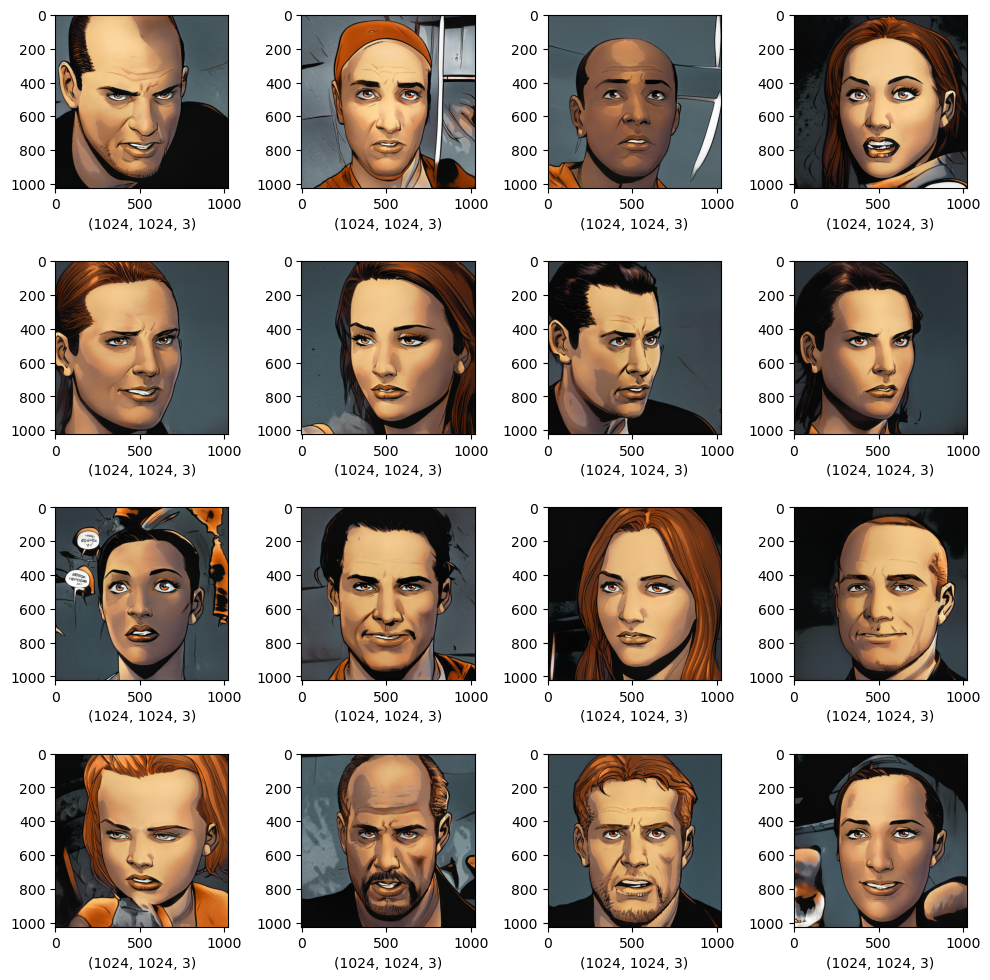

In [18]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    Reading_IMG = cv2.imread(Mix_Series[indexing])
    Reading_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)
    
    operations.set_xlabel(Reading_IMG.shape)
    operations.imshow(Reading_IMG)
    
plt.tight_layout()
plt.show()


In [19]:
len(ArtWork_Images_Series)

1000

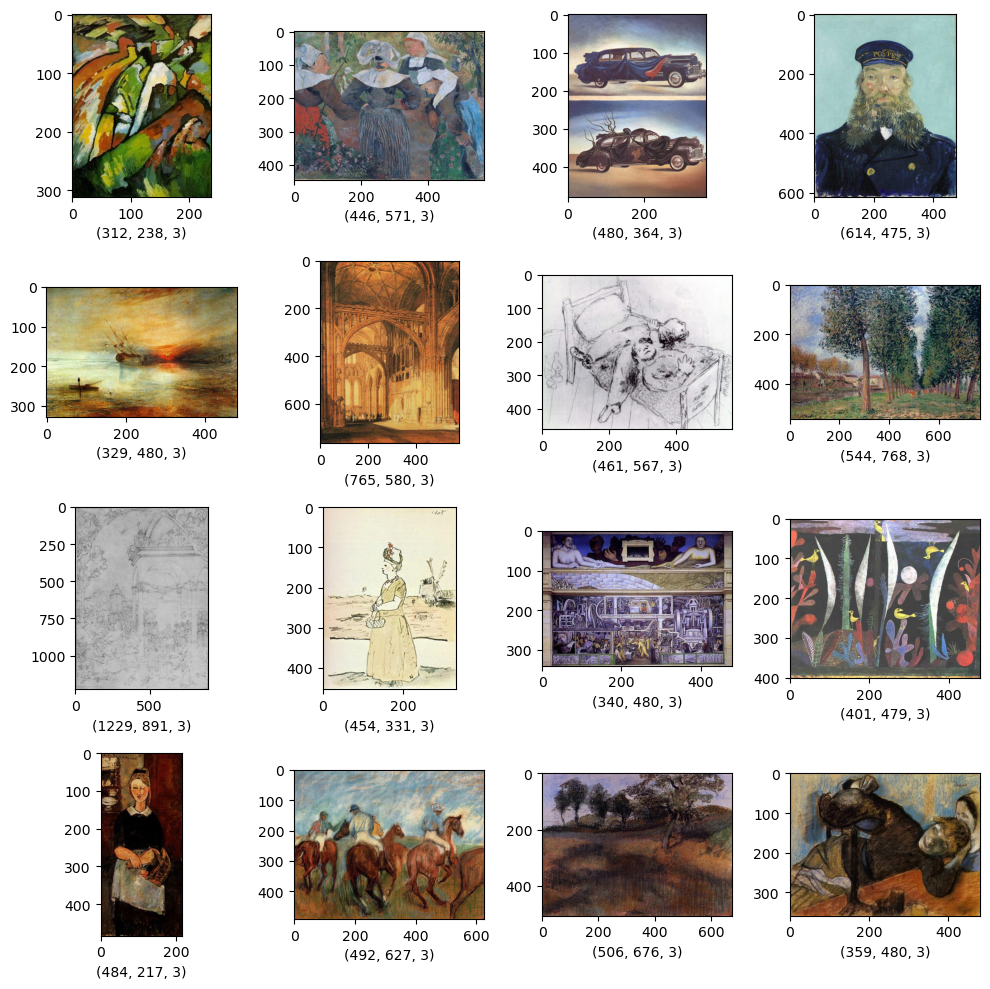

In [20]:

figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    Reading_IMG = cv2.imread(ArtWork_Images_Series[indexing])
    Reading_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)
    
    operations.set_xlabel(Reading_IMG.shape)
    operations.imshow(Reading_IMG)
    
plt.tight_layout()
plt.show()

In [21]:
X_Train = []

for picking_images in ArtWork_Images_Series:
    X_img = cv2.imread(picking_images)
    X_img = cv2.cvtColor(X_img,cv2.COLOR_BGR2RGB)
    X_img = cv2.resize(X_img,(180,180))
    X_img = X_img / 255.
    X_Train.append(X_img)

print("IT'S TRANSFORMED")

IT'S TRANSFORMED


In [22]:
print(np.shape(np.array(Mix_Series)))

(650,)


In [23]:
X_Train = np.asarray(X_Train)
print(X_Train.shape)

(1000, 180, 180, 3)


In [47]:
iterations = 10
vector_noise_dim = 180
count_example = 20
batch_size = 12
count_buffer = 60000

In [50]:
Train_Data = tf.data.Dataset.from_tensor_slices(X_Train).shuffle(count_buffer).batch(batch_size)

In [51]:
print(Train_Data)

<_BatchDataset element_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float64, name=None)>


In [52]:
def Generator_Model():
    
    
    Model = Sequential()
    #
    Model.add(Dense(90*90*128,use_bias=False,input_shape=(180,)))
    Model.add(BatchNormalization())
    Model.add(LeakyReLU())
    #
    Model.add(Reshape((90,90,128)))
    #
    Model.add(Conv2DTranspose(128,(3,3),padding="same",use_bias=False))
    Model.add(BatchNormalization())
    Model.add(LeakyReLU())
    
    Model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', use_bias=False))
    Model.add(BatchNormalization())
    Model.add(LeakyReLU())
       
    #
    Model.add(Conv2DTranspose(3,(3,3),padding="same",use_bias=False,activation="tanh"))
    
    
    return Model

In [53]:
Generator = Generator_Model()

In [54]:
print(Generator.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1036800)           186624000 
                                                                 
 batch_normalization_3 (Bat  (None, 1036800)           4147200   
 chNormalization)                                                
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1036800)           0         
                                                                 
 reshape_1 (Reshape)         (None, 90, 90, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 90, 90, 128)       147456    
 Transpose)                                                      
                                                                 
 batch_normalization_4 (Bat  (None, 90, 90, 128)      

In [55]:
print(Generator.layers)

[<keras.src.layers.core.dense.Dense object at 0x7fa926536700>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa92651ca00>, <keras.src.layers.activation.leaky_relu.LeakyReLU object at 0x7fa92651cfa0>, <keras.src.layers.reshaping.reshape.Reshape object at 0x7fa926539c40>, <keras.src.layers.convolutional.conv2d_transpose.Conv2DTranspose object at 0x7fa92653b970>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa92653bee0>, <keras.src.layers.activation.leaky_relu.LeakyReLU object at 0x7fa92653b1f0>, <keras.src.layers.convolutional.conv2d_transpose.Conv2DTranspose object at 0x7fa926543310>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa926540fd0>, <keras.src.layers.activation.leaky_relu.LeakyReLU object at 0x7fa9265489a0>, <keras.src.layers.convolutional.conv2d_transpose.Conv2DTranspose object at 0x7fa926548340>]


In [56]:
def Discriminator_Model():
    
    model = Sequential()
    
    model.add(Conv2D(64,(3,3),padding="same",input_shape=[180,180,3]))
    model.add(Dropout(0.3))
    model.add(LeakyReLU())
    
    model.add(Conv2D(128,(3,3),padding="same"))
    model.add(Dropout(0.3))
    model.add(LeakyReLU())
    
    model.add(Conv2D(256,(3,3),padding="same"))
    model.add(Dropout(0.3))
    model.add(LeakyReLU())
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    
    return model

In [57]:
Discriminator = Discriminator_Model()

In [58]:
print(Discriminator.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 dropout_3 (Dropout)         (None, 180, 180, 64)      0         
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 180, 180, 64)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 128)     73856     
                                                                 
 dropout_4 (Dropout)         (None, 180, 180, 128)     0         
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 180, 180, 128)     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 256)    

In [59]:
print(Generator.layers)

[<keras.src.layers.core.dense.Dense object at 0x7fa926536700>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa92651ca00>, <keras.src.layers.activation.leaky_relu.LeakyReLU object at 0x7fa92651cfa0>, <keras.src.layers.reshaping.reshape.Reshape object at 0x7fa926539c40>, <keras.src.layers.convolutional.conv2d_transpose.Conv2DTranspose object at 0x7fa92653b970>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa92653bee0>, <keras.src.layers.activation.leaky_relu.LeakyReLU object at 0x7fa92653b1f0>, <keras.src.layers.convolutional.conv2d_transpose.Conv2DTranspose object at 0x7fa926543310>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa926540fd0>, <keras.src.layers.activation.leaky_relu.LeakyReLU object at 0x7fa9265489a0>, <keras.src.layers.convolutional.conv2d_transpose.Conv2DTranspose object at 0x7fa926548340>]


In [60]:
Loss_Function = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [61]:
import tensorflow as tf

#reference: RMSprop https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/RMSprop
Generator_Optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, clipvalue=1.0)
Discriminator_Optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, clipvalue=1.0)


In [63]:
seed = tf.random.normal([count_example,vector_noise_dim])

In [64]:
def Discriminator_Loss(real_out,fake_out):
    
    real_loss_function = Loss_Function(tf.ones_like(real_out),real_out)
    fake_loss_function = Loss_Function(tf.zeros_like(fake_out),fake_out)
    total_loss = real_loss_function + fake_loss_function
    
    return total_loss

In [65]:
def Generator_Loss(fake_out):
    return Loss_Function(tf.ones_like(fake_out),fake_out)

In [66]:
def generate_and_save_images(model, epoch, test_input):
    
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(10, 10))
    
    for i in range(predictions.shape[0]):
        plt.subplot(5, 5, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('images_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [67]:
def Train_Step(images):
    
    random_noise_vector = tf.random.normal([batch_size,vector_noise_dim])
    
    with tf.GradientTape() as Generator_Tape, tf.GradientTape() as Discriminator_Tape:
        
        Generator_Fake_IMG = Generator(random_noise_vector,training=False)
        
        real_out = Discriminator(images,training=True)
        fake_out = Discriminator(Generator_Fake_IMG,training=True)
        
        Generator_Loss_Result = Generator_Loss(fake_out)
        Discriminator_Loss_Result = Discriminator_Loss(real_out,fake_out)
        
        Generator_Gradients = Generator_Tape.gradient(Generator_Loss_Result,Generator.trainable_variables)
        Discriminator_Gradients = Discriminator_Tape.gradient(Discriminator_Loss_Result,Discriminator.trainable_variables)
        
        Generator_Optimizer.apply_gradients(zip(Generator_Gradients,Generator.trainable_variables))
        Discriminator_Optimizer.apply_gradients(zip(Discriminator_Gradients,Discriminator.trainable_variables))

In [68]:
def Train_Function(dataset,iterations):
    
    for epoch in range(iterations):
        
        start = time.time()
        
        for image_batch in dataset:
            Train_Step(image_batch)
            
        display.clear_output(wait=True)
        generate_and_save_images(Generator,epoch+1,seed)
        
    display.clear_output(wait=True)
    generate_and_save_images(Generator,epoch,seed)

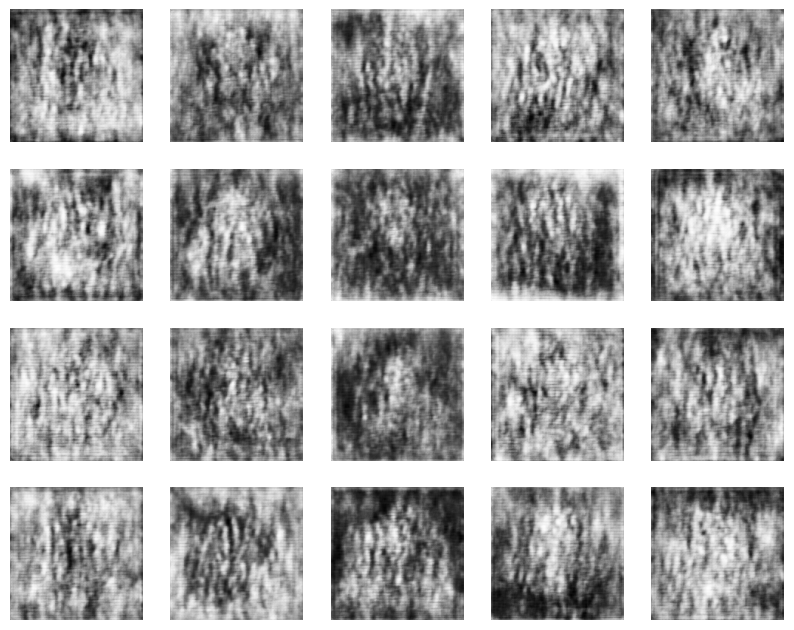

In [69]:
Train_Function(Train_Data, iterations)

In [70]:
Predict_Random_Noise = tf.random.normal(shape=[30,vector_noise_dim])

In [71]:
Generator_Prediction = Generator(Predict_Random_Noise)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


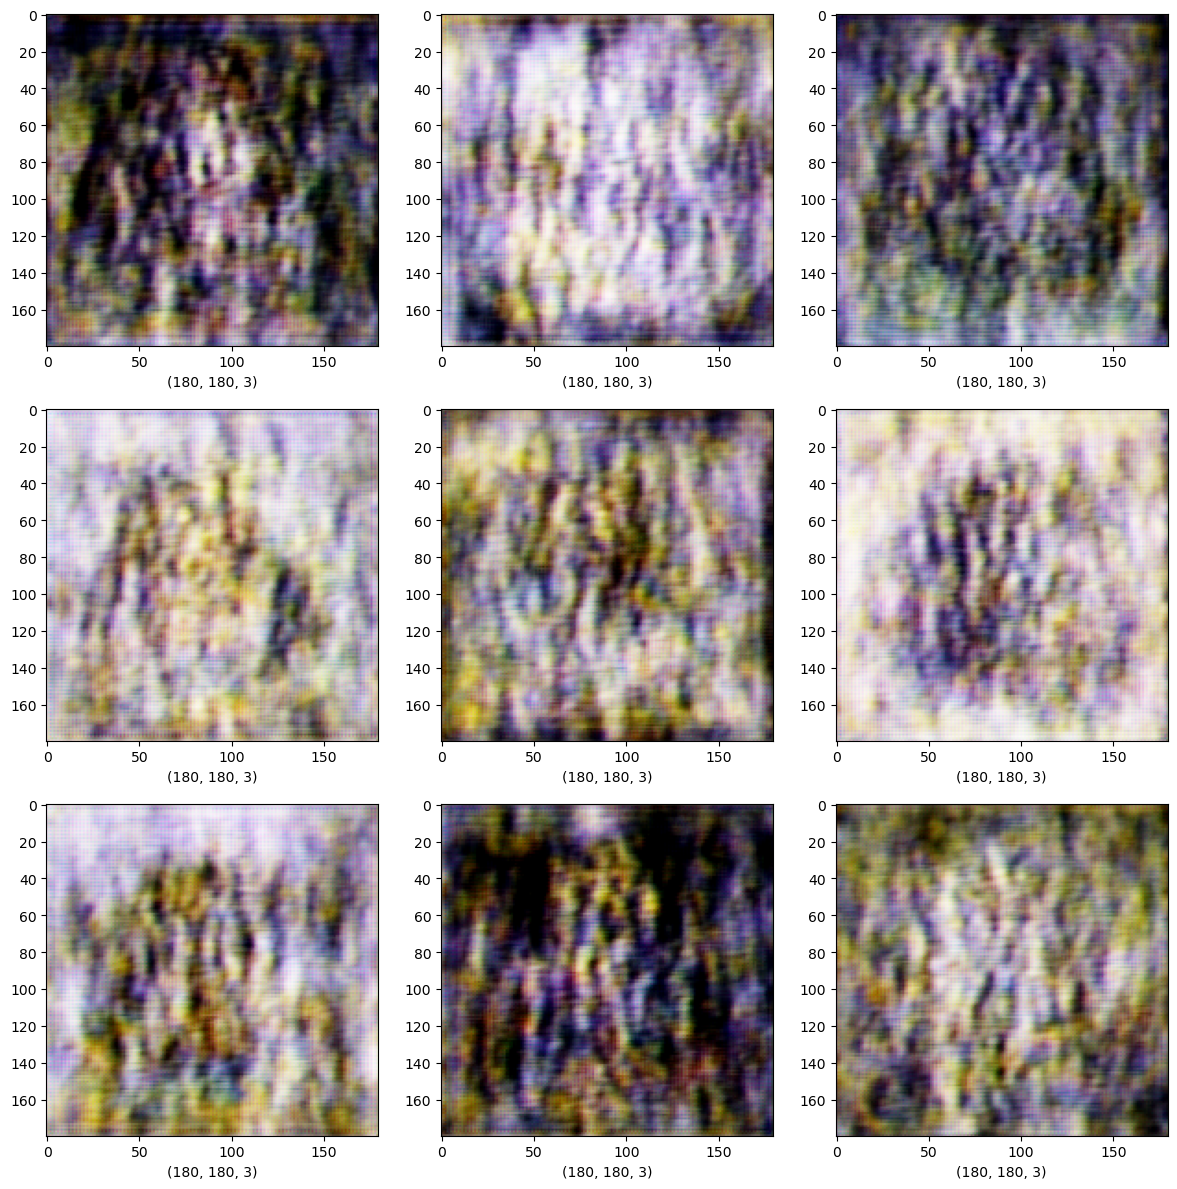

In [72]:
figure,axis = plt.subplots(3,3,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    Image_Picking = Generator_Prediction[i]
    ax.imshow(Image_Picking,cmap="gray")
    ax.set_xlabel(Image_Picking.shape)
    
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


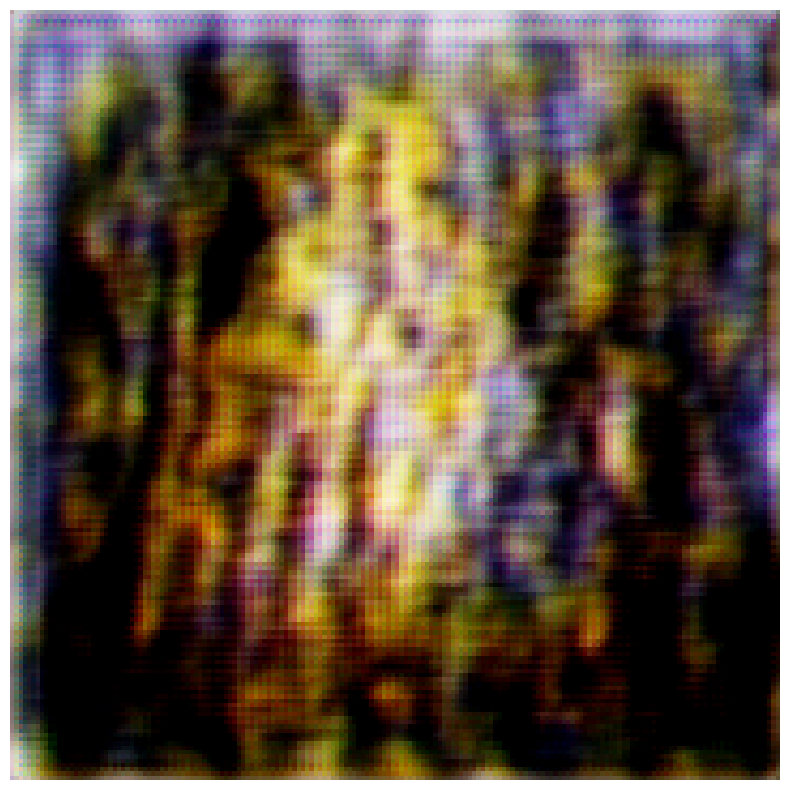

In [73]:
figure = plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(Generator_Prediction[25])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


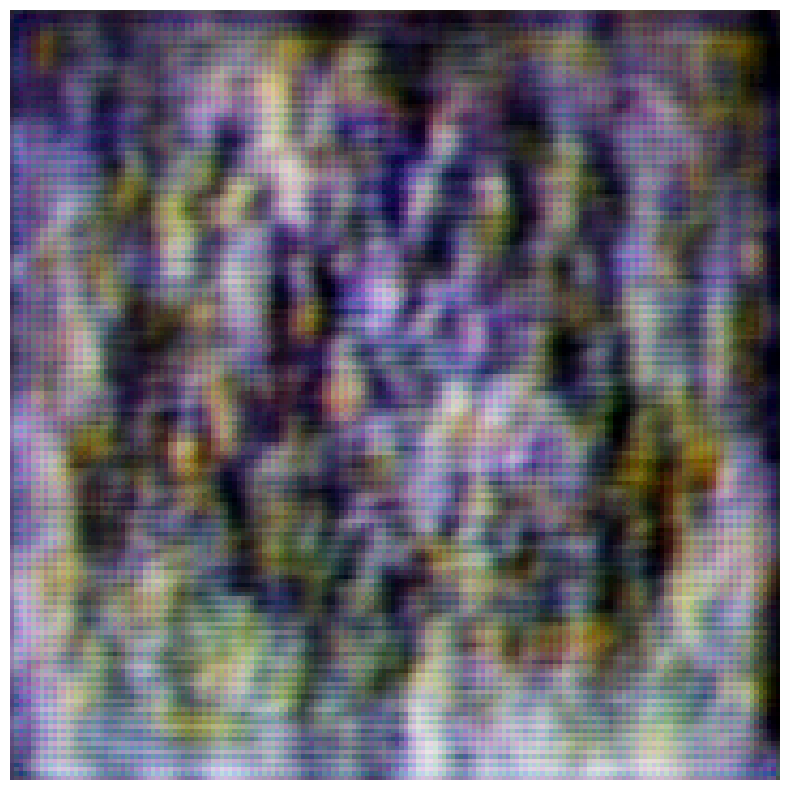

In [74]:
figure = plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(Generator_Prediction[2])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


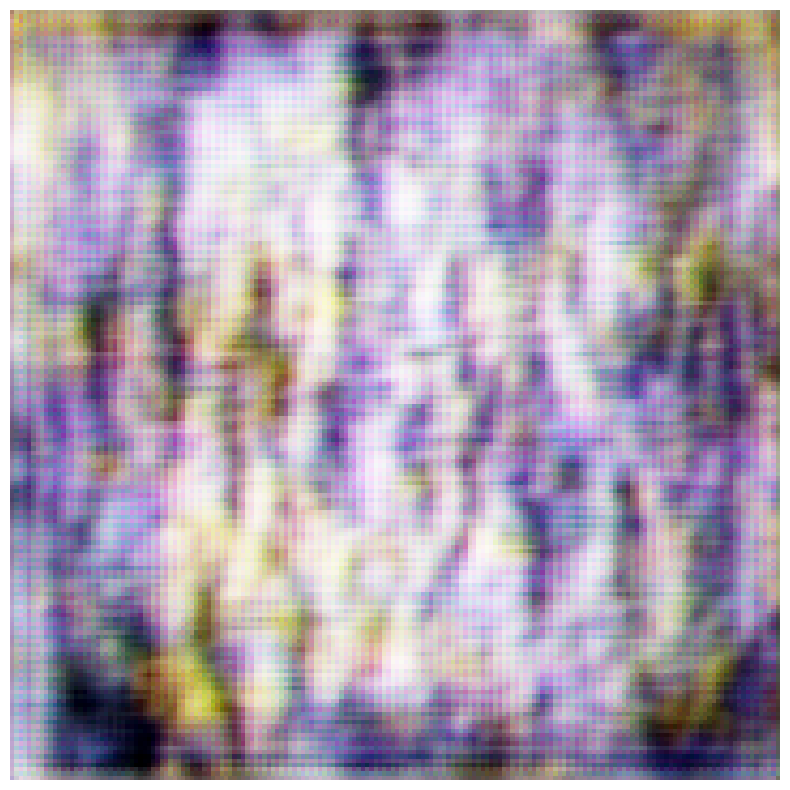

In [78]:
figure = plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(Generator_Prediction[1])
plt.show()